### Machine Learning for Engineers: [Deploy Machine Learning](https://www.apmonitor.com/pds/index.php/Main/DeployMachineLearning)
- [Deploy Machine Learning](https://www.apmonitor.com/pds/index.php/Main/DeployMachineLearning)
 - Description: Deploying machine learning is the process of making the machine learning solution available to produce results for people or computers to access the service remotely.
- [Course Overview](https://apmonitor.com/pds)
- [Course Schedule](https://apmonitor.com/pds/index.php/Main/CourseSchedule)

<img align=left width=400px src='https://apmonitor.com/pds/uploads/Main/deploy_machine_learning.png'>

### Pickled Python Objects

Pickle files store Python objects, lists of objects, or anything else that is accessible in a Python session. The list z is dumped to the Pickle file z.pkl.

<img align=left width=400 src='https://apmonitor.com/pds/uploads/Main/python_pickle.png'>

In [ ]:
z = [1,2,3]
import pickle
pickle.dump(z,open('z.pkl','wb'))

The `z.pkl` file can then be accessed later on that same computer or transferred to another computer and loaded.

In [ ]:
import pickle
y = pickle.load(open('z.pkl','rb'))
print(y)

### Store HDF5 Models

Some Python objects, such as Keras models, cannot be stored as Pickle files. The Hierarchical Data Format, version 5 (HDF5) is a file format that is designed to store large amounts of data, model architecture, parameter weights, and other information about machine learned models. Keras supports model save and load in HDF5 format.

<img width=100px align=left src='https://apmonitor.com/pds/uploads/Main/python_hdf5.png'>

The Keras model is saved with:

- Keras / TensorFlow model architecture (layers, nodes, connections) and configuration (hyper-parameters such as lbfgs or adam solver, loss function, epochs, early termination criteria)
- Weights that are adjusted during training and used for testing and validation

```python
# save model
model.save('store.h5')
```

The model is restored into the running program by calling load_model to read the hdf5 file and rebuilt the Keras model to perform testing, validation, or deploy the machine learning solution.

```python
# load model
from keras.models import load_model
model = load_model('store.h5')
```

[Concrete Image Classification](https://apmonitor.com/pds/index.php/Main/BitClassification) demonstrates TensorFlow training with an h5 file that transfers the model to the test program.

Found 200 images belonging to 2 classes.
Predicted Crack: Positive
    True Crack: Positive
    Correct?: True


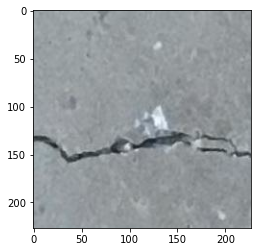

In [2]:
import cv2
import re
import random
import numpy as np
import os
import zipfile
import urllib.request
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

# download cracks.h5 (TensorFlow model)
file = 'cracks.h5'
url = 'http://apmonitor.com/pds/uploads/Main/'+file
urllib.request.urlretrieve(url, file)

# download concrete_cracks.zip (Images)
file = 'concrete_cracks.zip'
url = 'http://apmonitor.com/pds/uploads/Main/'+file
urllib.request.urlretrieve(url, file)

# extract archive and remove concrete_cracks.zip
with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall('./')
os.remove(file)

# Data processing
test_processor = ImageDataGenerator(rescale = 1./255)
test = test_processor.flow_from_directory('test',      \
    target_size = (128, 128), batch_size = 32,         \
    class_mode = 'categorical', shuffle = False)

# load the trained model
model = keras.models.load_model('cracks.h5')

ctype = ['Negative','Positive'] # possible output values
def make_prediction(image_fp):
    im = cv2.imread(image_fp) # load image
    plt.imshow(im)
    img = image.load_img(image_fp, target_size = (128,128))
    img = image.img_to_array(img)

    image_array = img / 255. # scale the image
    img_batch = np.expand_dims(image_array, axis = 0)

    predicted_value = ctype[model.predict(img_batch).argmax()]
    true_value = re.search(r'(Negative)|(Positive)', image_fp)[0]

    out = f"""Predicted Crack: {predicted_value}
    True Crack: {true_value}
    Correct?: {predicted_value == true_value}"""
    return out

# randomly select type (2) and image number (19901-20000)
i = random.randint(0,1); j = random.randint(19901,20000)
b = ctype[i]; im = str(j) + '.jpg'
test_image_filepath = r'./test/'+b+'/'+im
print(make_prediction(test_image_filepath))
plt.show()

### Deploy Logistic Regression

Pickle files can be used to store Scikit-learn machine learning models, data, scalars, or other objects needed to deploy an application on a server or other computer. A Logistic Regression model is trained on 800 data points that are randomly generated with the `make_blobs` function in `sklearn`.

In [ ]:
# Generate blobs dataset
from sklearn.datasets import make_blobs
features, label = make_blobs(n_samples=1000, centers=2,\
                             n_features=2, random_state=12)

# Split into train and test subsets (20% for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, shuffle=False)

# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)

# Store model and test data
import pickle
store = [lr,X_test,y_test]
pickle.dump(store,open('store.pkl','wb'))

# View data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.DataFrame({'x1':features[:,0],
                     'x2':features[:,1],
                     'y':label})
sns.pairplot(data,hue='y')
plt.show()

The model and test data are stored in a Pickle file `store.pkl`. That file can be transferred to another target computer to make predictions.

In [ ]:
# Retrieve model and test data
import pickle
[lr,X_test,y_test] = pickle.load(open('store.pkl','rb'))

# Predict
y_predict = lr.predict(X_test)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cmat = confusion_matrix(y_test,y_predict)
sns.heatmap(cmat,annot=True)
plt.show()

### Deploy Number Identification

The next activity is to split a program that includes training and testing into two separate programs. 

<img align=left width=500px src='https://apmonitor.com/pds/uploads/Main/activity.png'>

Use a pickle file to store the test data and the neural network model. Separate machine learning for number identification into a training and test program. Show that the test program can predict the second to last number in the dataset.

<img align=left width=500px src='https://apmonitor.com/pds/uploads/Main/classify_numbers.png'>

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(solver='lbfgs',alpha=1e-5,max_iter=200,\
                    activation='relu',hidden_layer_sizes=(10,30,10),\
                    random_state=1, shuffle=True)

# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split into train and test subsets (50% each)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Test on second half of data
n = np.random.randint(int(n_samples/2),n_samples)
print('Predicted: ' + str(classifier.predict(digits.data[n:n+1])[0]))

# Show number
plt.imshow(digits.images[n], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

**Solution:** The model and test data are stored in a Pickle file `store.pkl`.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

# The digits dataset
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split into train and test subsets (50% each)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Store model and test data
import pickle
store = [classifier,digits]
pickle.dump(store,open('store.pkl','wb'))

**Solution:** The pickle file `store.pkl` file can be transferred to another target computer to make predictions.

In [ ]:
# Retrieve model and test data
import pickle
[classifier,digits] = pickle.load(open('store.pkl','rb'))

# Test on second to last number
print('Predicted: ' + str(classifier.predict(digits.data[-2:-1])[0]))

# Show number
plt.imshow(digits.images[-2], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Deploy Gekko MPC

[Model Predictive Control](https://apmonitor.com/do/index.php/Main/AdvancedTemperatureControl) is an advanced control method to regulate multivariate dynamic systems.

<img align=left width=400px src='https://apmonitor.com/do/uploads/Main/mpc_mimo_tclab.gif'>

The first time through, the application is created and stored as `m.pkl`. When the `m.pkl` file exists, the pickle file is reloaded instead of creating a new application.

In [ ]:
from os.path import exists
import pickle
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

if exists('m.pkl'):
    # load model from subsequent call
    m = pickle.load(open('m.pkl','rb'))
    m.solve(disp=False)
else:
    # define model the first time
    m = GEKKO()
    m.time = np.linspace(0,20,41)

    m.p = m.MV(value=0, lb=0, ub=1)
    m.v = m.CV(value=0)
    m.Equation(5*m.v.dt() == -m.v + 10*m.p)
    m.options.IMODE = 6
    m.p.STATUS = 1; m.p.DCOST = 1e-3
    m.v.STATUS = 1; m.v.SP = 40; m.v.TAU = 5
    m.options.CV_TYPE = 2
    m.solve(disp=False)
pickle.dump(m,open('m.pkl','wb'))

plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,m.p.value,'b-',lw=2)
plt.ylabel('gas')
plt.subplot(2,1,2)
plt.plot(m.time,m.v.value,'r--',lw=2)
plt.ylabel('velocity')
plt.xlabel('time')
plt.show()